In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve,r2_score
from sklearn.neighbors import KNeighborsRegressor


In [2]:
data = pd.read_csv("zomato.csv",encoding = "ISO-8859-1")
country = pd.read_excel("Country-Code.xlsx")

data = pd.merge(data,country,on="Country Code")

In [3]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [4]:
data.shape

(9551, 22)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [6]:
data.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [7]:
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [8]:
# Group By Country

Text(0, 0.5, 'No. of Restaurants')

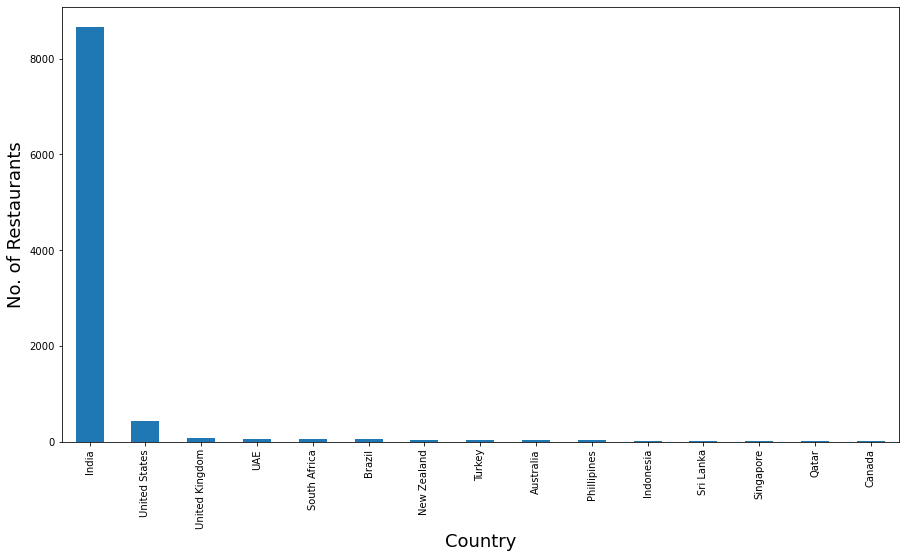

In [9]:
plt.figure(figsize=(15,8))

data.groupby("Country")["Restaurant ID"].count().sort_values(ascending=False).plot(kind="bar")
plt.xlabel("Country",fontsize=18)
plt.ylabel("No. of Restaurants",fontsize=18)

In [10]:
# Observation

# India has highest no. of zomato restaurants


Text(0, 0.5, 'No. of Restaurants')

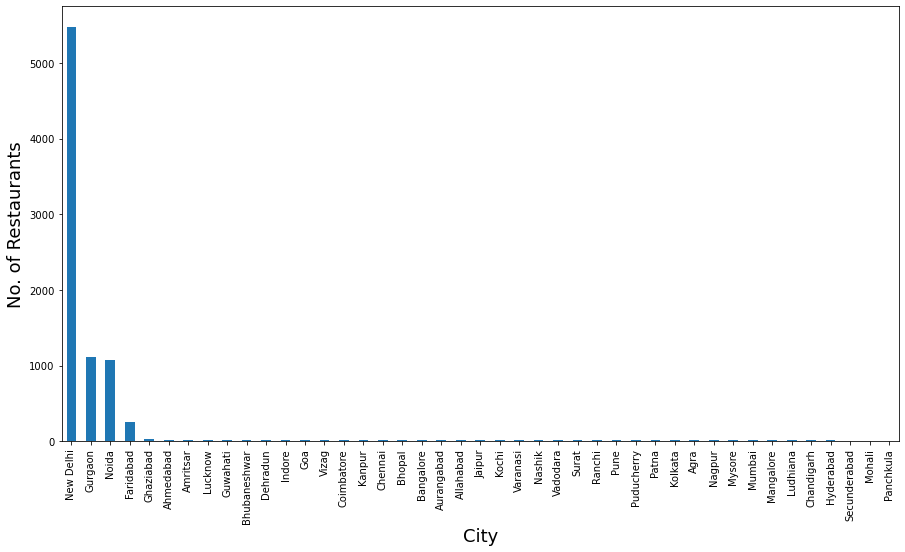

In [11]:
# City
plt.figure(figsize=(15,8))
data[data["Country"]=="India"].groupby("City")["Restaurant ID"].count().sort_values(ascending=False).plot(kind="bar")
plt.xlabel("City",fontsize=18)
plt.ylabel("No. of Restaurants",fontsize=18)


In [12]:
# New Delhi has Highst No. of restaurant

In [13]:
# City with avg rating

Text(0, 0.5, 'Avg Rating')

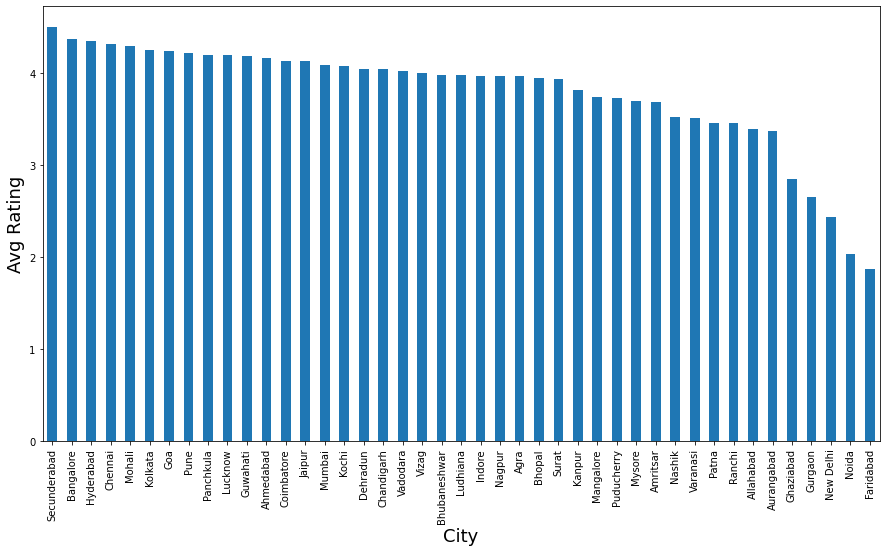

In [14]:
# City
plt.figure(figsize=(15,8))
data[data["Country"]=="India"].groupby("City")["Aggregate rating"].mean().sort_values(ascending=False).plot(kind="bar")
plt.xlabel("City",fontsize=18)
plt.ylabel("Avg Rating",fontsize=18)


In [15]:
# # Cities with Average Rating greater than 4

# Secunderabad    4.500000
# Bangalore       4.375000
# Hyderabad       4.344444
# Chennai         4.315000
# Mohali          4.300000
# Kolkata         4.255000
# Goa             4.245000
# Pune            4.220000
# Panchkula       4.200000
# Lucknow         4.195238
# Guwahati        4.190476
# Ahmedabad       4.161905
# Coimbatore      4.135000
# Jaipur          4.130000
# Mumbai          4.085000
# Kochi           4.080000
# Dehradun        4.050000
# Chandigarh      4.050000
# Vadodara        4.025000
# Vizag           4.005000

# Faridabaz has the lowest Average rating

# Faridabad       1.866932

Text(0, 0.5, 'No. of cuisines')

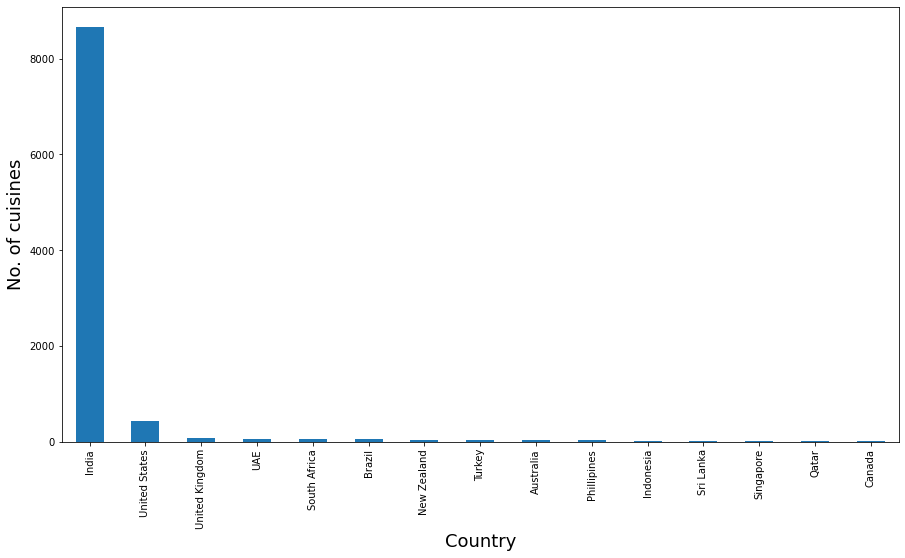

In [16]:
# Cuisines

# City
plt.figure(figsize=(15,8))
data.groupby("Country")["Cuisines"].count().sort_values(ascending=False).plot(kind="bar")
plt.xlabel("Country",fontsize=18)
plt.ylabel("No. of cuisines",fontsize=18)

Text(0, 0.5, 'No. of cuisines')

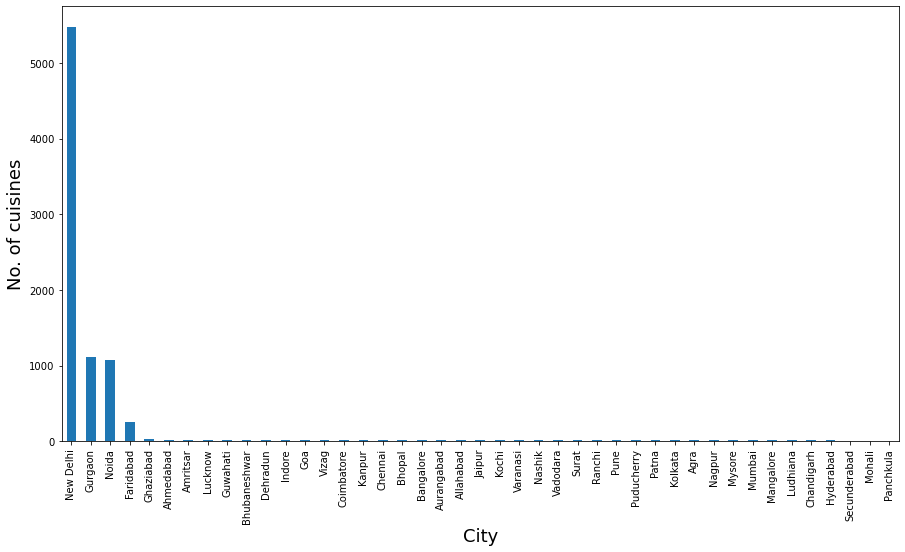

In [17]:
plt.figure(figsize=(15,8))
data[data["Country"]=="India"].groupby("City")["Cuisines"].count().sort_values(ascending=False).plot(kind="bar")
plt.xlabel("City",fontsize=18)
plt.ylabel("No. of cuisines",fontsize=18)

In [18]:
# In India, New Delhi has Highest No. of Cuisines

Text(0, 0.5, 'No. of cuisines')

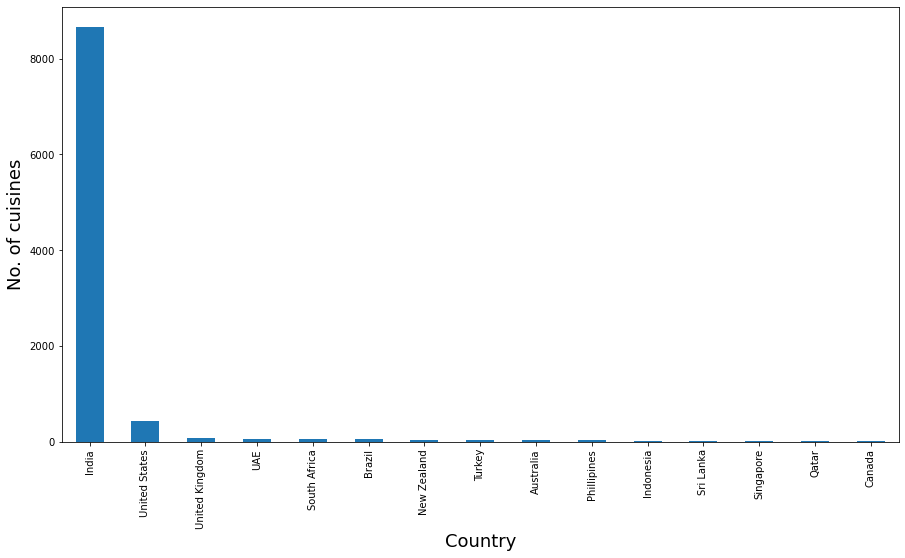

In [19]:
plt.figure(figsize=(15,8))
data.groupby("Country")["Cuisines"].count().sort_values(ascending=False).plot(kind="bar")
plt.xlabel("Country",fontsize=18)
plt.ylabel("No. of cuisines",fontsize=18)

In [20]:
# No. of Cuisnes wrt Country

# India             8652
# United States      425
# United Kingdom      80
# UAE                 60
# South Africa        60
# Brazil              60
# New Zealand         40
# Turkey              34
# Australia           24
# Phillipines         22
# Indonesia           21
# Sri Lanka           20
# Singapore           20
# Qatar               20
# Canada               4

Text(0, 0.5, 'Price')

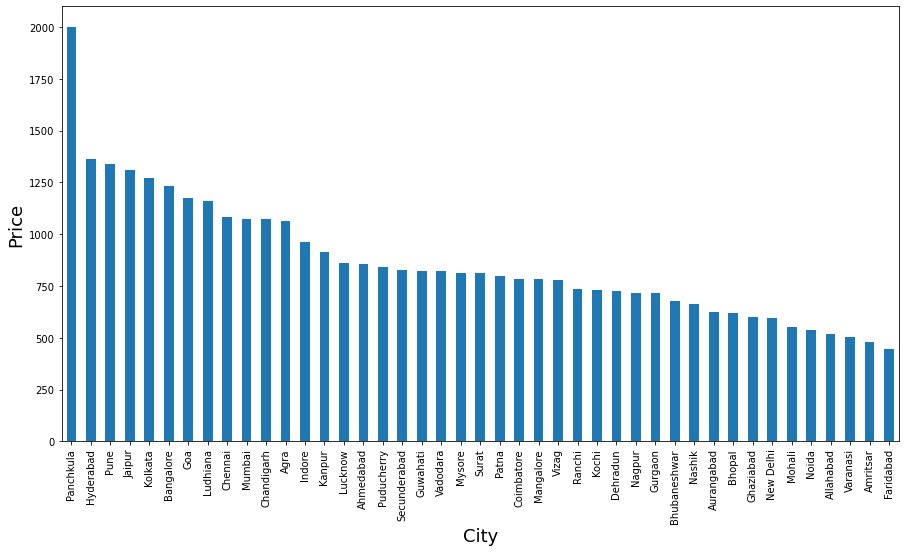

In [21]:
# Average cost of two wrt Cities
plt.figure(figsize=(15,8))
data[data["Country"]=="India"].groupby("City")["Average Cost for two"].mean().sort_values(ascending=False).plot(kind="bar")
plt.xlabel("City",fontsize=18)
plt.ylabel("Price",fontsize=18)

In [22]:

# Panchkula       2000.000000
# Hyderabad       1361.111111
# Pune            1337.500000
# Varanasi         505.000000
# Amritsar         480.952381
# Faridabad        447.609562

# Panchakula is the costliest and Faridabad is the cheapest city

In [23]:
# City wrt votes

Text(0, 0.5, 'Avg Votes')

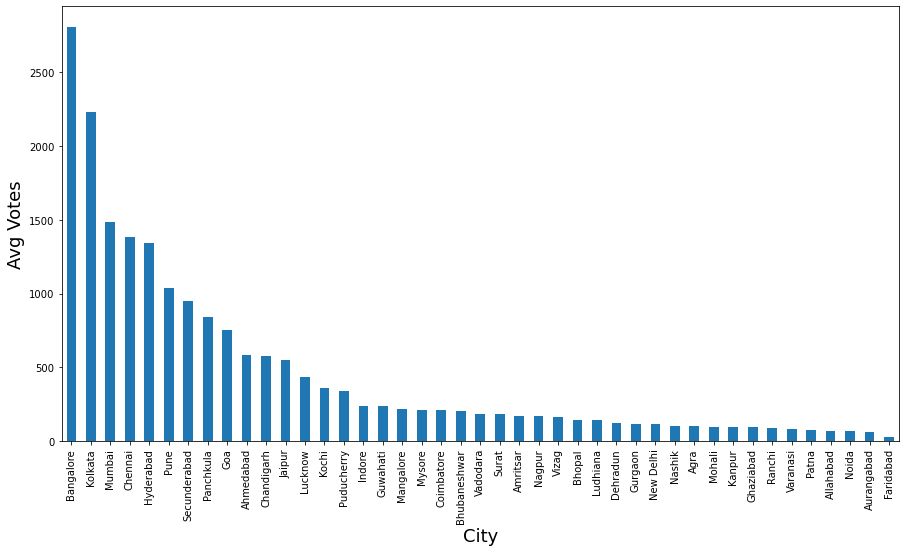

In [24]:
plt.figure(figsize=(15,8))
data[data["Country"]=="India"].groupby("City")["Votes"].mean().sort_values(ascending=False).plot(kind="bar")
plt.xlabel("City",fontsize=18)
plt.ylabel("Avg Votes",fontsize=18)

In [25]:
# Banglore has the highest Avg votes adn Faridabad has the lowest Avg votes

# City
# Bangalore       2805.750000
# Kolkata         2229.650000
# Mumbai          1484.850000
# Chennai         1384.750000
# Hyderabad       1340.833333
# Pune            1036.600000
# Aurangabad        64.800000
# Faridabad         25.840637

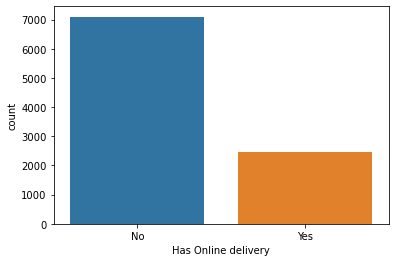

In [26]:
# online Delivery

sns.countplot(x=data["Has Online delivery"])

In [27]:
pd.crosstab(data["Rating text"],data["City"])

City,Abu Dhabi,Agra,Ahmedabad,Albany,Allahabad,Amritsar,Ankara,Armidale,Athens,Auckland,...,Vernonia,Victor Harbor,Vineland Station,Vizag,Waterloo,Weirton,Wellington City,Winchester Bay,Yorkton,ÛÁstanbul
Rating text,,,,,,,,,,,,,,,,,,,,,
Average,0,1,0,7,15,5,1,0,0,0,...,0,0,0,0,1,0,0,1,1,0
Excellent,7,1,3,0,0,0,5,0,3,9,...,0,0,0,2,0,0,3,0,0,5
Good,1,9,5,13,5,12,1,1,2,1,...,0,1,0,10,19,1,1,0,0,2
Not rated,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Poor,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Very Good,12,9,13,0,0,4,13,0,15,9,...,1,0,1,8,0,0,16,0,0,7


Text(0, 0.5, 'No. of Restaurants')

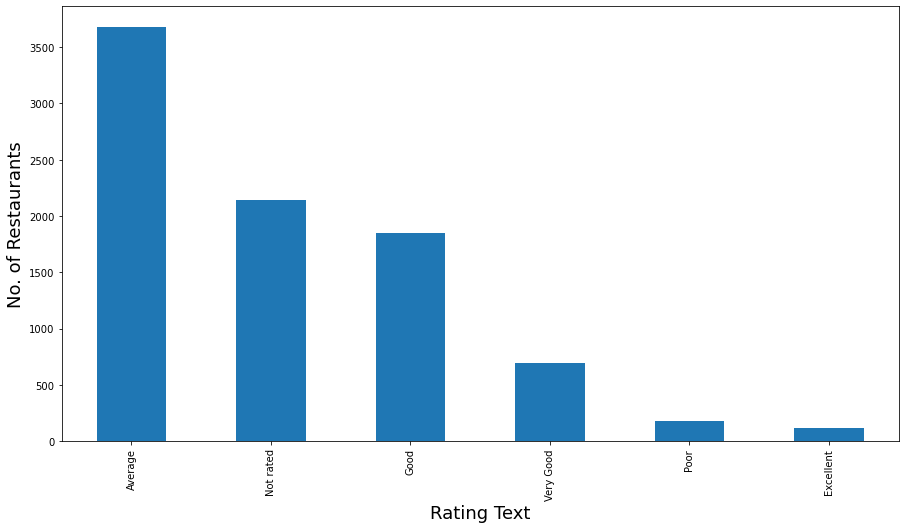

In [28]:
plt.figure(figsize=(15,8))
data[data["Country"]=="India"].groupby("Rating text")["City"].count().sort_values(ascending=False).plot(kind="bar")
plt.xlabel("Rating Text",fontsize=18)
plt.ylabel("No. of Restaurants",fontsize=18)

In [29]:
# Votes vs Avg Cost

Text(0, 0.5, 'Avg Cost For Two')

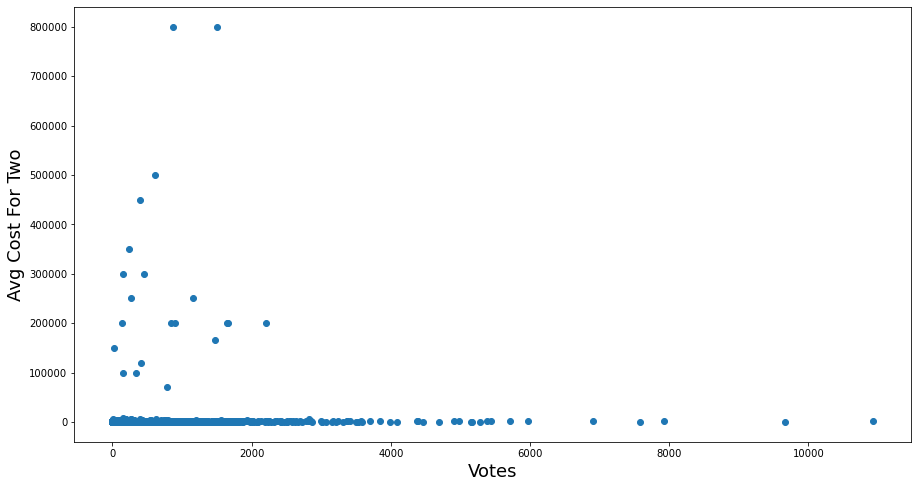

In [30]:
plt.figure(figsize=(15,8))
plt.scatter(data["Votes"],data["Average Cost for two"])
plt.xlabel("Votes",fontsize=18)
plt.ylabel("Avg Cost For Two",fontsize=18)

Text(0, 0.5, 'Average Price Range')

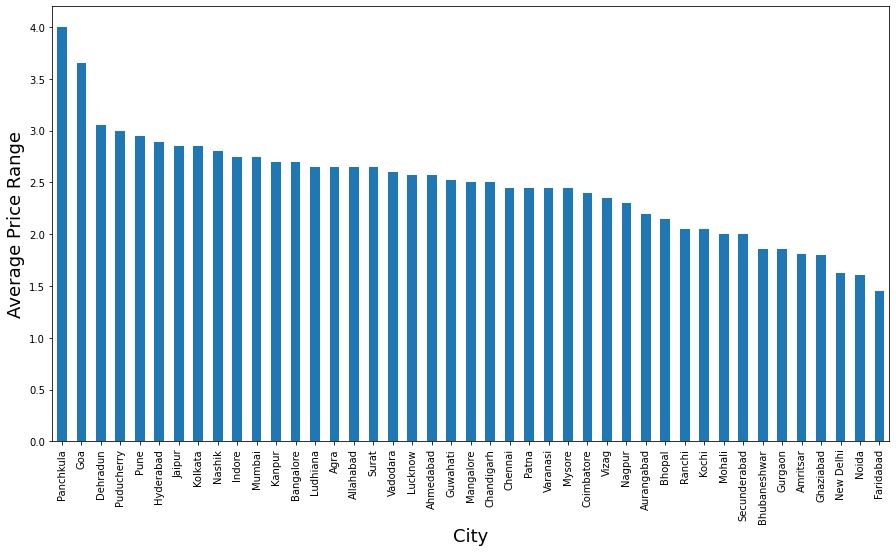

In [31]:
plt.figure(figsize=(15,8))
data[data["Country"]=="India"].groupby("City")["Price range"].mean().sort_values(ascending=False).plot(kind="bar")
plt.xlabel("City",fontsize=18)
plt.ylabel("Average Price Range",fontsize=18)

In [32]:
# We will create a model to predict the price depending upon Currency and Rating

In [33]:
le =LabelEncoder()

data["Currency"] = le.fit_transform(data["Currency"])
data["Rating text"] = le.fit_transform(data["Rating text"])


In [34]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,1,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,1,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,5,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,1,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,1,229,Phillipines


In [35]:
X = data[["Currency","Rating text"]]
Y = data["Average Cost for two"]

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=100)

In [36]:
train_score = []
test_score = []

for i in range(1,24):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train,y_train)
    
    train_pred = knn.predict(x_train)
    test_pred = knn.predict(x_test)
    
    train_score.append(r2_score(y_train,train_pred))
    test_score.append(r2_score(y_test,test_pred))

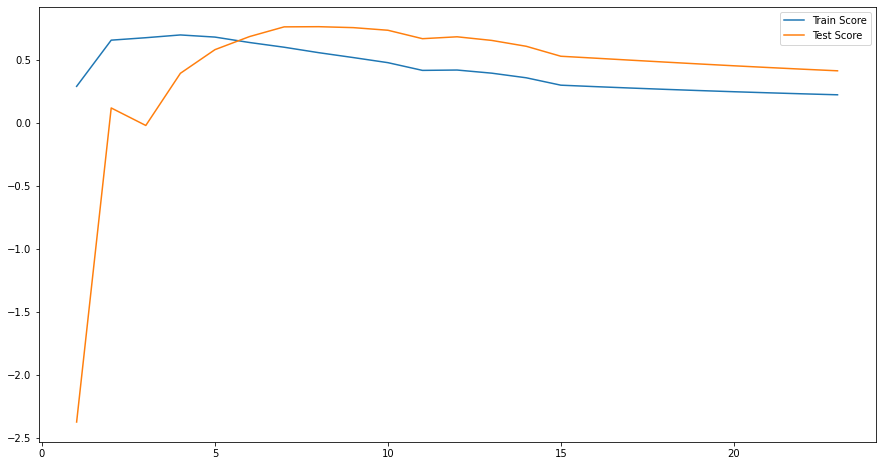

In [37]:
plt.figure(figsize=(15,8))

sns.lineplot(range(1,24),train_score,linestyle="dashed",label="Train Score")
sns.lineplot(range(1,24),test_score,linestyle="--",label="Test Score")

In [38]:
knn = KNeighborsRegressor(n_neighbors=6)
knn.fit(x_train,y_train)

pred = knn.predict(x_test)

print("Accuracy is : {}%".format(round(r2_score(y_test,pred)*100,2)))

Accuracy is : 68.36%
